In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd 

In [3]:
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
pip install --upgrade scikit-learn mlxtend

  Using cached mlxtend-0.23.3-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.3-py3-none-any.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


## 1. Exhaustive Feature Selection

Classification

In [16]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression(max_iter=1000)

sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

In [24]:
model=sel.fit(iris_df,iris.target)

Features: 15/15

In [26]:
model.best_score_

np.float64(0.9733333333333334)

In [28]:
model.best_feature_names_

('sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)')

In [30]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': np.float64(0.7533333333333333),
  'feature_names': ('sepal length (cm)',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.56666667, 0.63333333]),
  'avg_score': np.float64(0.5666666666666667),
  'feature_names': ('sepal width (cm)',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal length (cm)',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('petal width (cm)',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667]),
  'avg_score': np.float64(0.8133333333333332),
  'feature_names': ('sepal length (cm)', 'sepal width

In [33]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal length (cm),)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal width (cm), petal width (cm))",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))",0.032061,0.024944,0.012472


Regression

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['medv'], test_size=0.2, random_state=1)

In [42]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
# baseline model
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()


print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096213
testing 0.6514899901155404


In [48]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(X_train, y_train)

Features: 7996/8191IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [50]:
sel.best_score_

np.float64(0.6827988156800063)

In [52]:
sel.best_feature_names_

('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')

In [54]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.03941987916919132, 0.12695789031653215, -0....",0.129009,"(0,)",0.064226,0.086475,0.028825
1,"(1,)","[0.14236716209182754, -0.10598329567838705, 0....",0.100963,"(1,)",0.076751,0.103339,0.034446
2,"(2,)","[0.4055276765549376, 0.0029283993633670846, -0...",0.210465,"(2,)",0.139709,0.188107,0.062702
3,"(3,)","[-0.07110886674980432, -0.08269807310551558, 0...",-0.025663,"(3,)",0.055426,0.074627,0.024876
4,"(4,)","[0.18869831316675, 0.03113193162308736, 0.0348...",0.17746,"(4,)",0.114827,0.154605,0.051535
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8791441026861514, 0.576226384714265, 0.4354...",0.679213,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.096133,0.129436,0.043145
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8731761731752511, 0.5384374917854684, 0.458...",0.679018,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.098986,0.133276,0.044425
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8494627278072393, 0.5454006150975994, 0.444...",0.66547,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.099036,0.133343,0.044448
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8358451877451422, 0.5448662375728606, 0.449...",0.670075,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.094633,0.127415,0.042472


In [56]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1) 
    return 1 - (1 - r2) * coef

In [58]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [60]:
metric_df.sort_values('adjusted_r2',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8855189158291968, 0.5742220049707852, 0.437...",0.682799,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.096995,0.130595,0.043532,404,10,0.674728
7408,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.8717831363927702, 0.5819307800982585, 0.462...",0.680483,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.090811,0.122269,0.040756,404,9,0.673185
8141,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8792702841985806, 0.5752245789381261, 0.438...",0.681125,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)",0.096068,0.129348,0.043116,404,11,0.672177
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8734082301119797, 0.538138251576179, 0.4610...",0.680994,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.098795,0.133019,0.04434,404,11,0.672043
8153,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8853169531726776, 0.5751761822045902, 0.434...",0.680914,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.097075,0.130703,0.043568,404,11,0.67196
...,...,...,...,...,...,...,...,...,...,...
53,"(3, 11)","[0.07227421305699011, -0.026141441832760126, 0...",0.073485,"(3, 11)",0.069934,0.09416,0.031387,404,2,0.068864
11,"(11,)","[0.1200629474726852, 0.03143835749752166, -0.0...",0.068712,"(11,)",0.071116,0.095752,0.031917,404,1,0.066396
49,"(3, 7)","[-0.0371219722713414, -0.1671760395427997, 0.0...",0.057453,"(3, 7)",0.09446,0.127183,0.042394,404,2,0.052752
7,"(7,)","[0.004822573124353857, -0.09518844023749029, -...",0.038815,"(7,)",0.066813,0.089958,0.029986,404,1,0.036424


In [62]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [64]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218562
testing 0.7205819296124483


## 2. Backward Elimination

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)

(404, 13)


In [70]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096213
testing 0.6514899901155404


In [78]:

lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [80]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [87]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817178, 0.6920238509138777, 0.682...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863,404,13,0.692596
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710695, 0.6944570477695307, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865,404,12,0.696781
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.754710892556849, 0.6959627893665097, 0.7017...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758,404,11,0.699918
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.7706104220711025, 0.6854023389684323, 0.690...",0.704324,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.046449,0.036139,0.018069,404,9,0.69757
8,"(0, 1, 4, 5, 7, 8, 10, 12)","[0.7681719744800458, 0.6822126526818693, 0.670...",0.697727,"(0, 1, 4, 5, 7, 8, 10, 12)",0.04882,0.037984,0.018992,404,8,0.691605
7,"(0, 1, 4, 5, 7, 10, 12)","[0.7671638009750725, 0.6812300799626649, 0.661...",0.692234,"(0, 1, 4, 5, 7, 10, 12)",0.051644,0.040181,0.02009,404,7,0.686794
6,"(1, 4, 5, 7, 10, 12)","[0.7519120213497091, 0.6756087674652564, 0.646...",0.686004,"(1, 4, 5, 7, 10, 12)",0.046845,0.036447,0.018224,404,6,0.681258
5,"(4, 5, 7, 10, 12)","[0.7525552802357769, 0.6665033988504306, 0.639...",0.681065,"(4, 5, 7, 10, 12)",0.051233,0.039861,0.019931,404,5,0.677058
4,"(5, 7, 10, 12)","[0.7384743962575444, 0.640118850766883, 0.5873...",0.662544,"(5, 7, 10, 12)",0.063384,0.049315,0.024658,404,4,0.659161


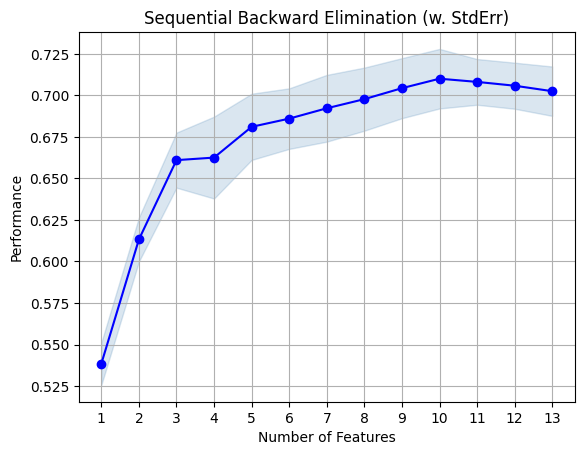

In [91]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt 

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [94]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218562
testing 0.7205819296124483
